# Housing Price Prediction

### Brandon Ritchie Yang

## Overview & Problem

The housing market is a complex and dynamic ecosystem influenced by numerous factors, including size, amenities, and locations. Accurate prediction of house prices is crucial for various stakeholders, including potential buyers, sellers, real estate agents, and investors. However, the task of predicting house prices presents significant challenges due to the complicated relationships between different factors and the possibility of non-linear patterns.

## Goal

The goal of this project is to perform data cleaning, data analysis and develop a robust machine learning model capable of accurately predicting house prices based on a comprehensive set of features. By identifying the key factors that influence house prices, we aim to provide a valuable tool for potential buyers, sellers, real estate agents, and investors. 

## Project Workflow

1. Data Collection & Import Libraries
2. Data Preprocessing
3. Exploratory Data Analysis
4. Encoding, Splitting, Normalization
5. Modeling
6. Model Tuning
7. Evaluation & Conclusion
8. Further Works Recommendation

### Import Libraries Needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import chardet

import warnings
warnings.filterwarnings("ignore")

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import RandomizedSearchCV

### Read File

Ensure that the CSV file is read correctly by detecting the encoding and then using the appropriate encoding when loading the data with pandas. This will provide the data to be loaded with the correct format and prevent errors that might occur if the encoding is not specified or is incorrect.

In [2]:
with open('rumah_tgr.csv', 'rb') as f:
    result = chardet.detect(f.read())

print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [3]:
df = pd.read_csv('rumah_tgr.csv', encoding='Windows-1252')
df

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²


### Pre-Processing

View columns inside the dataframe

In [4]:
df.columns

Index(['nav-link href', 'listing-location', 'price', 'bed', 'bath',
       'listing-floorarea', 'listing-floorarea 2'],
      dtype='object')

In [5]:
df.shape

(29420, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29420 entries, 0 to 29419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nav-link href        29420 non-null  object 
 1   listing-location     29420 non-null  object 
 2   price                29420 non-null  object 
 3   bed                  29282 non-null  float64
 4   bath                 29215 non-null  float64
 5   listing-floorarea    29420 non-null  object 
 6   listing-floorarea 2  29383 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


Check if the dataframe have some duplicated entries which can affect the process of analysis and modelling.

Some impact that can happen are:
1. **Inaccurate Results**: Duplicate data can lead to inflated counts, averages, and other statistical measures. This can distort the true picture of the data and lead to incorrect conclusions.
2. **Model Accuracy**: Duplicate data can introduce noise into the data, which can negatively impact the accuracy of machine learning models. Models trained on duplicate data may struggle to generalize to new, unseen data.
3. **Inefficient Processing**: Dealing with duplicate data can slow down data processing tasks, as the same information is being processed multiple times. This can reduce the efficiency of data modeling and analysis workflows.

In [7]:
df.duplicated().sum()

5241

In [8]:
df_new = df.drop_duplicates()
df_new.duplicated().sum()

0

In [9]:
df_new.shape

(24179, 7)

Missing values can significantly impact data modeling and analysis if not handled appropriately:

1. **Inaccurate Results**: Null values can lead to biased or incomplete analyses if not treated correctly. For example, if you calculate the average of a numeric column without considering null values, the result may be skewed.

2. **Model Performance Degradation**: Machine learning models often rely on complete data to learn patterns and make predictions. Missing values can reduce the model's ability to generalize to new data and may lead to decreased accuracy.

3. **Data Quality Issues**: Null values can indicate data quality problems, such as errors in data collection or processing. Addressing these underlying issues is essential for ensuring data reliability.

In [10]:
df_new.isnull().sum()

nav-link href            0
listing-location         0
price                    0
bed                    110
bath                   163
listing-floorarea        0
listing-floorarea 2     34
dtype: int64

<Figure size 1200x1000 with 0 Axes>

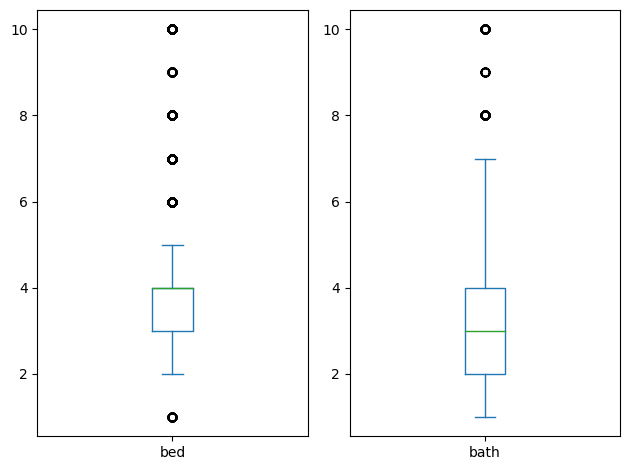

In [11]:
plt.figure(figsize=(12, 10))
df_new[['bed', 'bath']].plot(kind='box', subplots=True, layout=(1, 2))
plt.tight_layout()
plt.show()

Input null values with median when there are outliers present. Median represents the middle value in a sorted dataset, so outliers have a limited impact on its position.

In [12]:
df_new['bed'] = df_new['bed'].fillna(df_new['bed'].median())
df_new['bath'] = df_new['bath'].fillna(df_new['bath'].median())

In [13]:
df_new.isnull().sum()

nav-link href           0
listing-location        0
price                   0
bed                     0
bath                    0
listing-floorarea       0
listing-floorarea 2    34
dtype: int64

Process column "listing-floorarea 2" because the data is not in a proper datatype.

In [14]:
df_new['listing-floorarea 2'].value_counts()

Rp 20.000.000 per m²    353
Rp 16.666.667 per m²    294
Rp 10.000.000 per m²    282
Rp 25.000.000 per m²    277
Rp 15.000.000 per m²    198
                       ... 
Rp 29.434.750 per m²      1
Rp 29.247.619 per m²      1
Rp 50.266.379 per m²      1
Rp 16.818.182 per m²      1
Rp 31.011.111 per m²      1
Name: listing-floorarea 2, Length: 5891, dtype: int64

Separate "listing-floorarea 2" into 3 different columns:
1. the first column is for the currency (Rp)
2. the second column is for the nominal price
3. the third column is for the unit per floor area (m^2)

After defining the regular expression pattern, str.extract() is used to extract groups from the regular expression.

In [15]:
# \w+ is for the currency (RP)
# \s([\d\.]+) is for the price with dot(.) included
# \sper\s(.+) is to take the unit after 'per'
pattern = r'(\w+)\s([\d\.]+)\sper\s(.+)'
df_new[['currency-per-floorarea', 'price-per-floorarea', 'unit-per-floorarea']] = df_new['listing-floorarea 2'].str.extract(pattern)

df_new['price-per-floorarea'] = df_new['price-per-floorarea'].str.replace('.', '').astype(float)
df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2,currency-per-floorarea,price-per-floorarea,unit-per-floorarea
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,Rp,20720721.0,m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,Rp,12747875.0,m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,Rp,30859375.0,m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,Rp,18333333.0,m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,Rp,27777778.0,m²


In [16]:
df_new['currency-per-floorarea'].value_counts()

Rp    24145
Name: currency-per-floorarea, dtype: int64

In [17]:
df_new['unit-per-floorarea'].value_counts()

m²    24145
Name: unit-per-floorarea, dtype: int64

In [18]:
df_new.isnull().sum()

nav-link href              0
listing-location           0
price                      0
bed                        0
bath                       0
listing-floorarea          0
listing-floorarea 2       34
currency-per-floorarea    34
price-per-floorarea       34
unit-per-floorarea        34
dtype: int64

Since the currency and unit have the same value for all entries, so currency and unit column are dropped.

In [19]:
df_new = df_new.drop(columns=['currency-per-floorarea', 'unit-per-floorarea'], axis=1)
df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2,price-per-floorarea
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,20720721.0
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,12747875.0
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,30859375.0
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,18333333.0
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,27777778.0


In [20]:
df_new = df_new.rename(columns={'price-per-floorarea': 'listing-price-floorarea (per m^2)'})
df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2,listing-price-floorarea (per m^2)
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,20720721.0
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,12747875.0
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,30859375.0
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,18333333.0
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,27777778.0


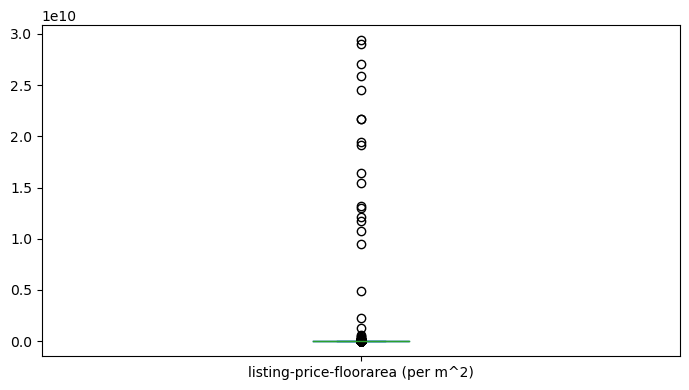

In [21]:
plt.figure(figsize=(7, 4))
df_new['listing-price-floorarea (per m^2)'].plot(kind='box')
plt.tight_layout()
plt.show()

Fill missing value with median since there are outliers for this column.

In [22]:
df_new['listing-price-floorarea (per m^2)'] = df_new['listing-price-floorarea (per m^2)'].fillna(df_new['listing-price-floorarea (per m^2)'].median())
df_new.isnull().sum()

nav-link href                         0
listing-location                      0
price                                 0
bed                                   0
bath                                  0
listing-floorarea                     0
listing-floorarea 2                  34
listing-price-floorarea (per m^2)     0
dtype: int64

Drop the original column after process the data

In [23]:
df_new = df_new.drop(columns=['listing-floorarea 2'], axis=1)
df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-price-floorarea (per m^2)
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,20720721.0
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,12747875.0
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,30859375.0
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,18333333.0
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,27777778.0


In [24]:
df_new.isnull().sum()

nav-link href                        0
listing-location                     0
price                                0
bed                                  0
bath                                 0
listing-floorarea                    0
listing-price-floorarea (per m^2)    0
dtype: int64

Separate "listing-floorarea" into 2 different columns:
1. the first column is for the floor area
2. the second column is for the listing floorarea unit (m^2)

After defining the regular expression pattern, str.extract() is used to extract groups from the regular expression.

In [25]:
# (\d+) is for numbers
# \s* for 0 or more spaces
# (.+) for everything after the number
pattern2 = r'(\d+)\s*(.+)'
df_new[['listing floorarea', 'listing floorarea unit']] = df_new['listing-floorarea'].str.extract(pattern2)

df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-price-floorarea (per m^2),listing floorarea,listing floorarea unit
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,20720721.0,420,m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,12747875.0,190,m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,30859375.0,132,m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,18333333.0,220,m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,27777778.0,180,m²


In [26]:
df_new['listing floorarea unit'].value_counts()

m²    24179
Name: listing floorarea unit, dtype: int64

Since the unit have the same value for all entries, so unit column is dropped.

In [27]:
df_new = df_new.drop('listing floorarea unit', axis=1)
df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-price-floorarea (per m^2),listing floorarea
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,20720721.0,420
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,12747875.0,190
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,30859375.0,132
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,18333333.0,220
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,27777778.0,180


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24179 entries, 0 to 29419
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   nav-link href                      24179 non-null  object 
 1   listing-location                   24179 non-null  object 
 2   price                              24179 non-null  object 
 3   bed                                24179 non-null  float64
 4   bath                               24179 non-null  float64
 5   listing-floorarea                  24179 non-null  object 
 6   listing-price-floorarea (per m^2)  24179 non-null  float64
 7   listing floorarea                  24179 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.7+ MB


In [29]:
df_new = df_new.rename(columns={'listing floorarea': 'listing floorarea (m^2)'})
df_new['listing floorarea (m^2)'] = df_new['listing floorarea (m^2)'].astype(float)
df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-price-floorarea (per m^2),listing floorarea (m^2)
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,20720721.0,420.0
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,12747875.0,190.0
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,30859375.0,132.0
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,18333333.0,220.0
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,27777778.0,180.0


Separate "price" into 2 different columns:
1. the first column is for the price number
2. the second column is for the price unit

After defining the regular expression pattern, str.extract() is used to extract groups from the regular expression.

In [30]:
# (\d+) is for numbers
# \s* for 0 or more spaces
# (.+) for everything after the number
pattern3 = r'([\d\,]+)\s*(.+)'
df_new[['price number', 'price unit']] = df_new['price'].str.extract(pattern3)

df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-price-floorarea (per m^2),listing floorarea (m^2),price number,price unit
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,20720721.0,420.0,"6,9",M
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,12747875.0,190.0,"4,5",M
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,30859375.0,132.0,"3,95",M
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,18333333.0,220.0,"3,3",M
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,27777778.0,180.0,"3,5",M


In [31]:
df_new['price unit'].value_counts()

M                20271
jt                3793
0                   48
9                   15
rb                  12
5                    7
1                    3
.500 M               3
8                    3
.300 M               2
.450 M               2
2                    2
.050 M               1
.800 M               1
.250 M               1
.700 M               1
.850 M               1
.350 M               1
4                    1
.750 M               1
3                    1
jt - Rp 1 M          1
M - Rp 2,3 M         1
jt - Rp 1,1 M        1
M - Rp 2,7 M         1
.100 M               1
.400 M               1
Name: price unit, dtype: int64

In [32]:
df_new['price'].value_counts()

3,5 M            524
2,5 M            456
1,5 M            405
4,5 M            402
1,2 M            395
                ... 
3,099999999 M      1
478 jt             1
1,20675 M          1
1,028429 M         1
4,7447 M           1
Name: price, Length: 2116, dtype: int64

Since the data for price is super messy, data cleaning and processing is needed for column price. Function categorize_price is to process and change the unit to 'Miliar' or 'Juta'. With this the price will have the same unit for the price in Billion and in Million. If the price is not in Billion or Million or it is not in a fix price it will return 'other'.

In [33]:
def categorize_price(price):
    if 'M' in price:
        return 'Miliar'
    if 'm' in price:
        return 'Miliar'
    elif 'JT' in price:
        return 'Juta'
    elif 'Jt' in price:
        return 'Juta'
    elif 'jT' in price:
        return 'Juta'
    elif 'jt' in price:
        return 'Juta'
    else:
        return 'other'

The price category for 'other' is only <100 entries so category 'other' will be drop.

In [34]:
df_new['price unit'] = df_new['price'].apply(categorize_price)
df_new['price unit'].value_counts()

Miliar    20291
Juta       3793
other        95
Name: price unit, dtype: int64

In [35]:
df_new = df_new[df_new['price unit'] != 'other']
df_new['price unit'].value_counts()

Miliar    20291
Juta       3793
Name: price unit, dtype: int64

Convert the data in column 'price number' to a only numbers with '.' as the separator.

In [36]:
df_new['price number'] = df_new['price']
df_new['price number'] = df_new['price number'].str.replace(',', '.')
df_new['price number'] = df_new['price number'].str.replace(' M', '')
df_new['price number'] = df_new['price number'].str.replace(' m', '')
df_new['price number'] = df_new['price number'].str.replace(' JT', '')
df_new['price number'] = df_new['price number'].str.replace(' Jt', '')
df_new['price number'] = df_new['price number'].str.replace(' jT', '')
df_new['price number'] = df_new['price number'].str.replace(' jt', '')

df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-price-floorarea (per m^2),listing floorarea (m^2),price number,price unit
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,20720721.0,420.0,6.9,Miliar
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,12747875.0,190.0,4.5,Miliar
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,30859375.0,132.0,3.95,Miliar
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,18333333.0,220.0,3.3,Miliar
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,27777778.0,180.0,3.5,Miliar


Convert the price number to the real value according to the price unit. If the unit is Miliar, the price number will be times by 1 Billion, and if the unit is Juta, the price number will be times by 1 Million.

In [37]:
def convert_to_numeric(price, category):
    try:
        number = float(price.split()[0])
    except:
        return np.nan
    
    if category == 'Miliar':
        return number * 1000000000
    elif category == 'Juta':
        return number * 1000000
    else:
        return np.nan

In [38]:
df_new['prices'] = df_new.apply(lambda row: convert_to_numeric(row['price number'], row['price unit']), axis=1)
df_new.head()

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-price-floorarea (per m^2),listing floorarea (m^2),price number,price unit,prices
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,20720721.0,420.0,6.9,Miliar,6.900000e+09
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,12747875.0,190.0,4.5,Miliar,4.500000e+09
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,30859375.0,132.0,3.95,Miliar,3.950000e+09
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,18333333.0,220.0,3.3,Miliar,3.300000e+09
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,27777778.0,180.0,3.5,Miliar,3.500000e+09


In [39]:
df_new['prices'].isnull().sum()

0

Drop the original data with messy data.

In [40]:
df_new = df_new.drop(columns=['listing-floorarea', 'price', 'price number', 'price unit'], axis=1)
df_new.head()

,nav-link href,listing-location,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",5.0,5.0,20720721.0,420.0,6.900000e+09
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.0,3.0,12747875.0,190.0,4.500000e+09
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.0,3.0,30859375.0,132.0,3.950000e+09
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.0,3.0,18333333.0,220.0,3.300000e+09
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.0,2.0,27777778.0,180.0,3.500000e+09


In [41]:
df_new['listing-location'].value_counts()

Bintaro, Tangerang Selatan, Banten                                                    3639
BSD, Tangerang Selatan, Banten                                                        2012
Gading Serpong, Tangerang Selatan, Banten                                              620
Ciputat, Tangerang Selatan, Banten                                                     547
Serpong, Tangerang Selatan, Banten                                                     489
                                                                                      ... 
Babakan, Setu, South Tangerang City, Banten 15315, Setu, Tangerang Selatan, Banten       1
Garuda komplek pajek, Pondok Aren, Tangerang Selatan, Banten                             1
ICON COSMO BSD-Khusus Buyer, BSD, Tangerang Selatan, Banten                              1
Dijual Rumah Di Graha Raya Bintaro, Serpong Utara, Tangerang Selatan, Banten             1
Savia Park, Serpong, Tangerang Selatan, Banten                                           1

Split the location from the last 3 word from the listing-location since they are the main area in Tangerang Selatan. The 3 columns will be 'district', 'city', 'province'.

In [42]:
def split_location(location):
    parts = location.split(',')
    parts = [part.strip() for part in parts]
    if len(parts) > 3:
        # Take only the last 3 parts
        return parts[-3:]
    elif len(parts) == 3:
        # If exactly 3 parts, return them as-is
        return parts
    else:
        # If less than 3 parts, fill missing parts with NaN or empty strings
        return [''] * (3 - len(parts)) + parts

In [43]:
df_new[['district', 'city', 'province']] = pd.DataFrame(df_new['listing-location'].apply(split_location).tolist(), index=df_new.index)
df_new.head()

,nav-link href,listing-location,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,city,province
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",5.0,5.0,20720721.0,420.0,6.900000e+09,Gading Serpong,Tangerang Selatan,Banten
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.0,3.0,12747875.0,190.0,4.500000e+09,Gading Serpong,Tangerang Selatan,Banten
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.0,3.0,30859375.0,132.0,3.950000e+09,Gading Serpong,Tangerang Selatan,Banten
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.0,3.0,18333333.0,220.0,3.300000e+09,Gading Serpong,Tangerang Selatan,Banten
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.0,2.0,27777778.0,180.0,3.500000e+09,Gading Serpong,Tangerang Selatan,Banten


In [44]:
df_new['province'].value_counts()

Banten    24084
Name: province, dtype: int64

In [45]:
df_new['city'].value_counts()

Tangerang Selatan    24084
Name: city, dtype: int64

In [46]:
df_new['district'].value_counts()

Bintaro           8900
BSD               4575
Pamulang          1755
Serpong           1730
Gading Serpong    1663
Ciputat           1612
Pondok Aren       1241
Ciputat Timur     1072
Serpong Utara      711
Alam Sutera        621
Setu               182
Pagedangan          15
Ciledug              3
Cinere               1
Bsd                  1
Serua                1
Larangan             1
Name: district, dtype: int64

In [47]:
df_new['district'] = df_new['district'].str.replace('Bsd', 'BSD')
df_new['district'].value_counts()

Bintaro           8900
BSD               4576
Pamulang          1755
Serpong           1730
Gading Serpong    1663
Ciputat           1612
Pondok Aren       1241
Ciputat Timur     1072
Serpong Utara      711
Alam Sutera        621
Setu               182
Pagedangan          15
Ciledug              3
Cinere               1
Serua                1
Larangan             1
Name: district, dtype: int64

Change district type to 'other' if the count of the district is less than 100. This is done because the ratio between the district which have the entries under 100 especially which only have 1 value is not balance with the district which have hundreds or thousands entries.

In [48]:
district_counts = df_new['district'].value_counts()
rare_districts = district_counts[district_counts < 100].index
df_new['district'] = df_new['district'].replace(rare_districts, 'other')

df_new['district'].value_counts()

Bintaro           8900
BSD               4576
Pamulang          1755
Serpong           1730
Gading Serpong    1663
Ciputat           1612
Pondok Aren       1241
Ciputat Timur     1072
Serpong Utara      711
Alam Sutera        621
Setu               182
other               21
Name: district, dtype: int64

Drop province and city since they have the same value and drop listing-location (original column).

In [49]:
df_new = df_new.drop(columns=['province', 'city', 'listing-location'], axis=1)
df_new.head()

,nav-link href,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district
0,https://www.rumah.com/listing-properti/dijual-...,5.0,5.0,20720721.0,420.0,6.900000e+09,Gading Serpong
1,https://www.rumah.com/listing-properti/dijual-...,3.0,3.0,12747875.0,190.0,4.500000e+09,Gading Serpong
2,https://www.rumah.com/listing-properti/dijual-...,3.0,3.0,30859375.0,132.0,3.950000e+09,Gading Serpong
3,https://www.rumah.com/listing-properti/dijual-...,4.0,3.0,18333333.0,220.0,3.300000e+09,Gading Serpong
4,https://www.rumah.com/listing-properti/dijual-...,3.0,2.0,27777778.0,180.0,3.500000e+09,Gading Serpong


Separate the link of the listed house by '/'

In [50]:
df_split = df_new['nav-link href'].str.split('/', expand=True)
df_split.columns = [f'part_{i+1}' for i in range(df_split.shape[1])]
df_split.head()
# df = pd.concat([df, df_split], axis=1)

,part_1,part_2,part_3,part_4,part_5,part_6
0,https:,,www.rumah.com,listing-properti,dijual-jual-cepat-cluster-aquamarine-oleh-vonn...,None
1,https:,,www.rumah.com,listing-properti,dijual-jual-cepat-cluster-alexandrite-oleh-von...,None
2,https:,,www.rumah.com,listing-properti,dijual-jual-cepat-cluster-vivaldi-oleh-vonni-2...,None
3,https:,,www.rumah.com,listing-properti,dijual-jual-cepat-cluster-starling-oleh-vonni-...,None
4,https:,,www.rumah.com,listing-properti,dijual-jual-cepat-cluster-newton-oleh-vonni-21...,None


In [51]:
df_split['part_6'].value_counts()

dijual-vinus88-residence-oleh-pt-multi-sarana-satria-19402705#119                 1
dijual-clarity-house-oleh-pt-easton-urban-kapital-20483486#1159                   1
dijual-aria-rempoa-oleh-greenwoods-group-21528659#1393                            1
dijual-fortunia-residences-2-at-southcity-oleh-southcity-20569049#1221            1
dijual-nano-town-4-oleh-nanoland-20708266#1254                                    1
dijual-aspen-park-serpong-oleh-pt-serpong-indah-prestasi-20724936#1262            1
dijual-parkville-serpong-oleh-grand-house-mulia-20767955#1267                     1
dijual-balboa-estate-pondok-cabe-oleh-pt-teman-properti-aradhana-21409781#1385    1
Name: part_6, dtype: int64

In [52]:
df_split['part_5'].value_counts()

proyek                                                                                                      8
dijual-jual-cepat-cluster-aquamarine-oleh-vonni-21410668                                                    1
dijual-bintaro-oleh-linka-21092304                                                                          1
dijual-bintaro-oleh-linka-21137070                                                                          1
dijual-bsd-oleh-linka-21133716                                                                              1
                                                                                                           ..
dijual-permata-bintaro-oleh-darmadi-21622773                                                                1
dijual-vania-permata-bintaro-oleh-darmadi-21725433                                                          1
dijual-callysta-graha-raya-oleh-darmadi-21725209                                                            1
dijual-bin

In [53]:
df_split['part_4'].value_counts()

listing-properti    24084
Name: part_4, dtype: int64

In [54]:
df_split['part_3'].value_counts()

www.rumah.com    24084
Name: part_3, dtype: int64

In [55]:
df_split['part_2'].value_counts()

    24084
Name: part_2, dtype: int64

In [56]:
df_split['part_1'].value_counts()

https:    24084
Name: part_1, dtype: int64

Drop columns that have the same value for all entries

In [57]:
df_split = df_split.drop(columns=['part_1', 'part_2', 'part_3', 'part_4'], axis=1)
df_split.head()

,part_5,part_6
0,dijual-jual-cepat-cluster-aquamarine-oleh-vonn...,None
1,dijual-jual-cepat-cluster-alexandrite-oleh-von...,None
2,dijual-jual-cepat-cluster-vivaldi-oleh-vonni-2...,None
3,dijual-jual-cepat-cluster-starling-oleh-vonni-...,None
4,dijual-jual-cepat-cluster-newton-oleh-vonni-21...,None


Extract agent name from the link which occur after the word 'oleh'. My hypothesis is that agent name can give more information and help the model to learn better.

In [58]:
def extract_agent_name(link):
    if link:
        match = re.search(r'oleh-([^-0-9]+(?:-[^-0-9]+)*)', link)
        return match.group(1) if match else None

In [59]:
df_split.isnull().sum()

part_5        0
part_6    24076
dtype: int64

In [60]:
df_split['agent'] = df_split['part_5'].apply(extract_agent_name)
df_split.isnull().sum()

part_5        0
part_6    24076
agent         8
dtype: int64

In [61]:
df_split['agent'] = df_split['agent'].fillna(df_split['part_6'].apply(extract_agent_name))
df_split.isnull().sum()

part_5        0
part_6    24076
agent         0
dtype: int64

In [62]:
df_split.head()

,part_5,part_6,agent
0,dijual-jual-cepat-cluster-aquamarine-oleh-vonn...,None,vonni
1,dijual-jual-cepat-cluster-alexandrite-oleh-von...,None,vonni
2,dijual-jual-cepat-cluster-vivaldi-oleh-vonni-2...,None,vonni
3,dijual-jual-cepat-cluster-starling-oleh-vonni-...,None,vonni
4,dijual-jual-cepat-cluster-newton-oleh-vonni-21...,None,vonni


Extract the area of the house from the link to get a more specific area of the house.

In [63]:
def extract_area(link):
    if link:
        match = re.search(r'dijual-([^-]+(?:-[^-]+)*)-oleh', link)
        return match.group(1).replace('-', ' ') if match else None

In [64]:
df_split['area'] = df_split['part_5'].apply(extract_area)
df_split.isnull().sum()

part_5        0
part_6    24076
agent         0
area         43
dtype: int64

In [65]:
df_split['area'] = df_split['area'].fillna(df_split['part_6'].apply(extract_area))
df_split.isnull().sum()

part_5        0
part_6    24076
agent         0
area         35
dtype: int64

The null values occur because there are no specific area from the link (only agent)

In [66]:
df_test = df_split[df_split['area'].isna()]
df_test.head()

,part_5,part_6,agent,area
3807,dijual-oleh-endang-kumalasari-21490097,None,endang-kumalasari,None
4350,dijual-oleh-endang-kumalasari-21808045,None,endang-kumalasari,None
5915,dijual-oleh-endang-kumalasari-21429713,None,endang-kumalasari,None
5917,dijual-oleh-endang-kumalasari-21430072,None,endang-kumalasari,None
5921,dijual-oleh-endang-kumalasari-21435580,None,endang-kumalasari,None


In [67]:
df_split.head()

,part_5,part_6,agent,area
0,dijual-jual-cepat-cluster-aquamarine-oleh-vonn...,None,vonni,jual cepat cluster aquamarine
1,dijual-jual-cepat-cluster-alexandrite-oleh-von...,None,vonni,jual cepat cluster alexandrite
2,dijual-jual-cepat-cluster-vivaldi-oleh-vonni-2...,None,vonni,jual cepat cluster vivaldi
3,dijual-jual-cepat-cluster-starling-oleh-vonni-...,None,vonni,jual cepat cluster starling
4,dijual-jual-cepat-cluster-newton-oleh-vonni-21...,None,vonni,jual cepat cluster newton


Extract the area again for the area which still have the word 'jual' in front of it

In [68]:
def extract_area_2(area):
    if area:
        match = re.search(r'jual(.+)', area)
        return match.group(1).strip() if match else area

In [69]:
df_split['area'] = df_split['area'].apply(extract_area_2)
df_split.isnull().sum()

part_5        0
part_6    24076
agent         0
area         35
dtype: int64

Extract the area again for the area which still have the word 'cepat' in front of it

In [70]:
df_split.head()

,part_5,part_6,agent,area
0,dijual-jual-cepat-cluster-aquamarine-oleh-vonn...,None,vonni,cepat cluster aquamarine
1,dijual-jual-cepat-cluster-alexandrite-oleh-von...,None,vonni,cepat cluster alexandrite
2,dijual-jual-cepat-cluster-vivaldi-oleh-vonni-2...,None,vonni,cepat cluster vivaldi
3,dijual-jual-cepat-cluster-starling-oleh-vonni-...,None,vonni,cepat cluster starling
4,dijual-jual-cepat-cluster-newton-oleh-vonni-21...,None,vonni,cepat cluster newton


In [71]:
def extract_area_3(area):
    if area:
        match = re.search(r'cepat(.+)', area)
        return match.group(1).strip() if match else area

In [72]:
df_split['area'] = df_split['area'].apply(extract_area_3)
df_split.isnull().sum()

part_5        0
part_6    24076
agent         0
area         35
dtype: int64

In [73]:
df_split.head()

,part_5,part_6,agent,area
0,dijual-jual-cepat-cluster-aquamarine-oleh-vonn...,None,vonni,cluster aquamarine
1,dijual-jual-cepat-cluster-alexandrite-oleh-von...,None,vonni,cluster alexandrite
2,dijual-jual-cepat-cluster-vivaldi-oleh-vonni-2...,None,vonni,cluster vivaldi
3,dijual-jual-cepat-cluster-starling-oleh-vonni-...,None,vonni,cluster starling
4,dijual-jual-cepat-cluster-newton-oleh-vonni-21...,None,vonni,cluster newton


In [74]:
df_split['area'].value_counts()

bintaro                                                                           330
bintaro jaya                                                                      232
pamulang                                                                          156
bsd                                                                               141
bintaro sektor 9                                                                  124
                                                                                 ... 
for sale rumah bintaro jaya modern minimalis baru full renovasi                     1
pisok bintaro jaya                                                                  1
rumah luas bebas banjir strategis dekat pamulang tangsel harga all in bisa kpr      1
rumah dlm komplek pertamina rengas ciputat timur tangsel lokasi strategis           1
rumah cantik full furnished bintaro jaya sektor 9 1223 ry                           1
Name: area, Length: 17118, dtype: int64

In [75]:
df_split = df_split.drop(columns=['part_5', 'part_6'])
df_split.head()

,agent,area
0,vonni,cluster aquamarine
1,vonni,cluster alexandrite
2,vonni,cluster vivaldi
3,vonni,cluster starling
4,vonni,cluster newton


In [76]:
df_new = pd.concat([df_new, df_split], axis=1)
df_new.head()

,nav-link href,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,agent,area
0,https://www.rumah.com/listing-properti/dijual-...,5.0,5.0,20720721.0,420.0,6.900000e+09,Gading Serpong,vonni,cluster aquamarine
1,https://www.rumah.com/listing-properti/dijual-...,3.0,3.0,12747875.0,190.0,4.500000e+09,Gading Serpong,vonni,cluster alexandrite
2,https://www.rumah.com/listing-properti/dijual-...,3.0,3.0,30859375.0,132.0,3.950000e+09,Gading Serpong,vonni,cluster vivaldi
3,https://www.rumah.com/listing-properti/dijual-...,4.0,3.0,18333333.0,220.0,3.300000e+09,Gading Serpong,vonni,cluster starling
4,https://www.rumah.com/listing-properti/dijual-...,3.0,2.0,27777778.0,180.0,3.500000e+09,Gading Serpong,vonni,cluster newton


In [77]:
df_new['area'] = df_new['area'].fillna('other')

In [78]:
df_new = df_new.drop('nav-link href', axis=1)
df_new.head()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,agent,area
0,5.0,5.0,20720721.0,420.0,6.900000e+09,Gading Serpong,vonni,cluster aquamarine
1,3.0,3.0,12747875.0,190.0,4.500000e+09,Gading Serpong,vonni,cluster alexandrite
2,3.0,3.0,30859375.0,132.0,3.950000e+09,Gading Serpong,vonni,cluster vivaldi
3,4.0,3.0,18333333.0,220.0,3.300000e+09,Gading Serpong,vonni,cluster starling
4,3.0,2.0,27777778.0,180.0,3.500000e+09,Gading Serpong,vonni,cluster newton


In [79]:
df_new.isnull().sum()

bed                                  0
bath                                 0
listing-price-floorarea (per m^2)    0
listing floorarea (m^2)              0
prices                               0
district                             0
agent                                0
area                                 0
dtype: int64

In [80]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24084 entries, 0 to 29419
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bed                                24084 non-null  float64
 1   bath                               24084 non-null  float64
 2   listing-price-floorarea (per m^2)  24084 non-null  float64
 3   listing floorarea (m^2)            24084 non-null  float64
 4   prices                             24084 non-null  float64
 5   district                           24084 non-null  object 
 6   agent                              24084 non-null  object 
 7   area                               24084 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


In [81]:
df_new.duplicated().sum()

480

In [82]:
duplicates = df_new[df_new.duplicated(keep=False)]

duplicates

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,agent,area
1,3.0,3.0,12747875.0,190.0,4.500000e+09,Gading Serpong,vonni,cluster alexandrite
7,3.0,3.0,12747875.0,190.0,4.500000e+09,Gading Serpong,vonni,cluster alexandrite
115,5.0,3.0,17777778.0,270.0,3.200000e+09,Bintaro,artha,rumah bintaro sektor 2
158,3.0,2.0,13333333.0,66.0,8.000000e+08,Pamulang,ogi-irawan,magani residence 4 pamulang
163,4.0,3.0,19444444.0,250.0,3.500000e+09,Bintaro,santi,brand new sektor 9 bintaro
...,...,...,...,...,...,...,...,...
29066,4.0,3.0,30833333.0,200.0,3.700000e+09,Bintaro,meily,rumah cantik di bintaro sektor 9 tangerang sel...
29088,2.0,2.0,24489796.0,118.0,2.400000e+09,BSD,rony-ming,rumah welton direct access toll jorr
29089,3.0,3.0,26250000.0,132.0,2.940000e+09,BSD,rony-ming,rumah carribean flamingo segera hubungi kami u...
29091,2.0,1.0,25806452.0,41.0,8.000000e+08,BSD,gaspro,rumah mewah fresco virginia rumah murah di gad...


In [83]:
df_new = df_new.drop_duplicates(keep='first')
df_new.duplicated().sum()

0

In [146]:
df_new['agent'].value_counts()

0.000042    693
0.000085    650
0.000127    573
0.000381    486
0.000169    480
           ... 
0.002627     62
0.002584     61
0.002330     55
0.002161     51
0.002118     50
Name: agent, Length: 108, dtype: int64

In [84]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23604 entries, 0 to 29419
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bed                                23604 non-null  float64
 1   bath                               23604 non-null  float64
 2   listing-price-floorarea (per m^2)  23604 non-null  float64
 3   listing floorarea (m^2)            23604 non-null  float64
 4   prices                             23604 non-null  float64
 5   district                           23604 non-null  object 
 6   agent                              23604 non-null  object 
 7   area                               23604 non-null  object 
dtypes: float64(5), object(3)
memory usage: 1.6+ MB


The **describe()** function provides a summary of the statistical properties of a DataFrame or Series. It calculates various statistics, including:

1. Count: The number of non-null values in each column.
2. Mean: The average value of each column.
3. Std: The standard deviation of each column.
4. Min: The minimum value of each column.
5. 25%: The first quartile (25th percentile) of each column.
6. 50%: The median (50th percentile) of each column.
7. 75%: The third quartile (75th percentile) of each column.
8. Max: The maximum value of each column.

Our target variable is prices and the average (mean) prices is around 3.7 billion and a median (50%) of 2.5 billion. 

In [85]:
df_new.describe()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices
count,23604.000000,23604.000000,2.360400e+04,23604.000000,2.360400e+04
mean,3.761142,2.996145,3.348972e+07,213.466573,3.702908e+09
std,1.353680,1.358232,5.346883e+08,2754.508363,1.062286e+10
min,1.000000,1.000000,1.989000e+03,1.000000,1.050000e+06
25%,3.000000,2.000000,1.333333e+07,81.000000,1.399000e+09
50%,4.000000,3.000000,1.850110e+07,142.000000,2.500000e+09
75%,4.000000,4.000000,2.430556e+07,240.000000,4.400000e+09
max,10.000000,10.000000,2.937500e+10,400000.000000,8.755000e+11


### Exploratory Data Analysis

**Explanatory data analysis** is a critical step in the data science process that aims to understand, explore, and uncover insights within a dataset. Its primary goal is to identify patterns, relationships, and trends that can provide valuable information for decision-making and further analysis.

**Chart 1**: The distribution for District, Bed, and Bath. The data are shown with bar chart and pie chart.

**District Distribution**: There are a total of 12 Districts in the dataset and the most occurance district is from Bintaro and followed by BSD with a percentage of 36.7% and 19.1% respectively. The next most occurance after Bintaro and BSD are from Pamulang, Serpong, Gading Serpong, and Ciputat for around 7% each. Lastly, the rest of the district is around 0.1%-5% of the occurance.

**Bedroom Distribution**: There are a total of 10 category of bedroom in the dataset and the most occurance is from 3 bedroom with around 32.8% occurance in the dataset. A 4 bedroom house is also common with a 27.8% of the occurance and follow by 2 and 5 bedroom for around 15-16% of the occurance. This data occurs because most of the family in Indonesia and more specifically in Tangerang have a family members of 3 to 6 people. The house with more than 5 Bedroom have occurance of under 5% for each category. Lastly the least occurance is from 1 bedroom with only 73 data or around 0.3%.

**Bathroom Distribution**: There a total of 10 category of bathroom in the dataset and the most occurance is from 3 and 2 bathroom with around 29.7% and 29.6% occurance in the dataset. Next most occurance is from 4 bathroom with 20.1% and follow by 1 bathroom with 10% occurance. The house with more than 4 bathroom have less than 7% for each category.

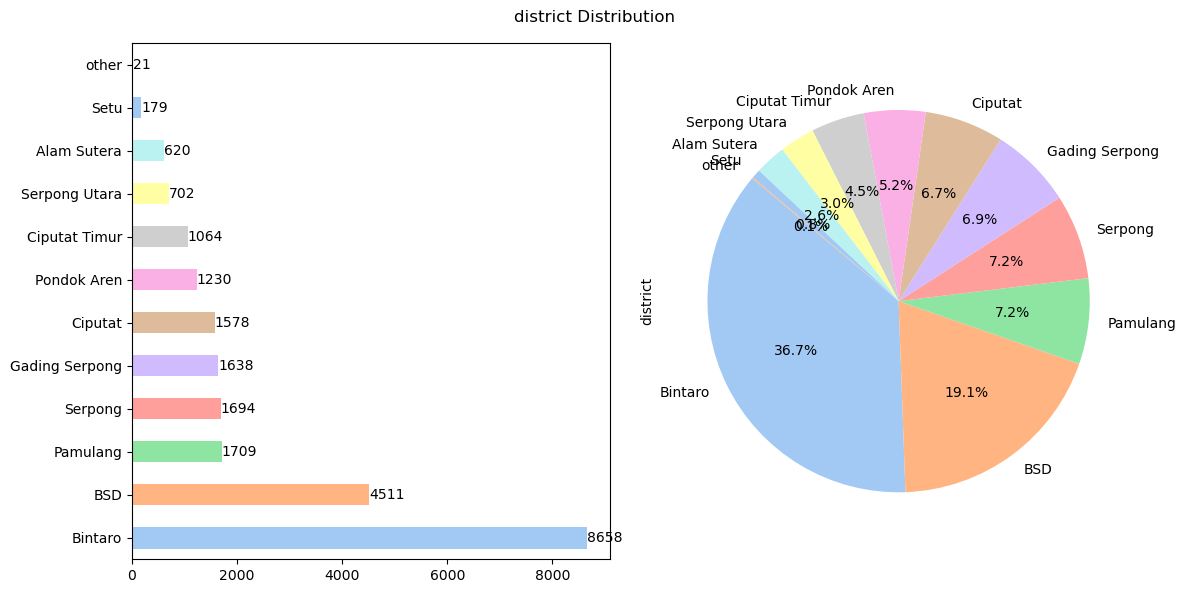

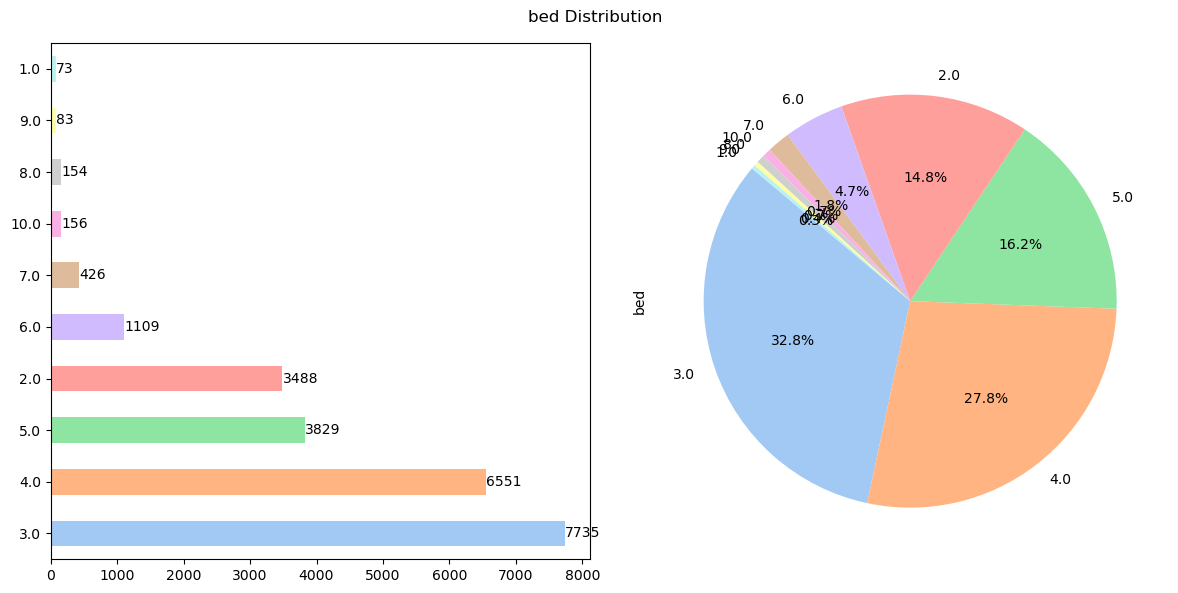

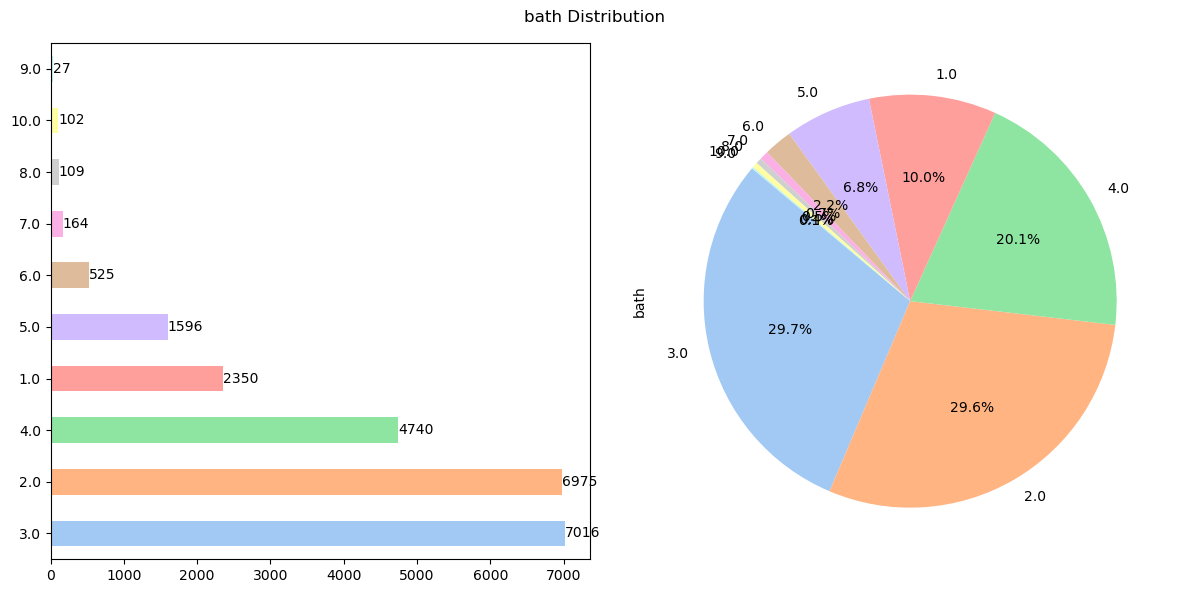

In [86]:
to_plot = ['district', 'bed', 'bath']
chart_color = sns.color_palette('pastel')

for column in to_plot:
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f'{column} Distribution')
    
    plt.subplot(1, 2, 1)
    df_new[column].value_counts().plot(kind='barh', color=chart_color)
    for i, v in enumerate(df_new[column].value_counts()):
        plt.text(v + 0.1, i, str(v), va='center')
    
    plt.subplot(1, 2, 2)
    df_new[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=chart_color)
    
    plt.tight_layout()
    plt.show()

**Chart 2**: Visualization of the total agent per district.

The most agent in a district is in Bintaro and follow by BSD with a total agent of 909 agent and 865 agent. Next most total agent is in Serpong, Ciputat, and Pamulang for around 600 agent. Ciputat Timur and Pondok Aren have a total agent for around 400 agent. Gading Serpong and Serpong Utara for around 300 agent and Alam Sutera with 242 total agent. Lastly there are only under 100 agent for Setu and other district each. 

This result is almost similar to the District distribution because more agent is needed for the district with higher amount of house. Hence, the number of total agent follows the number of occurance of district.

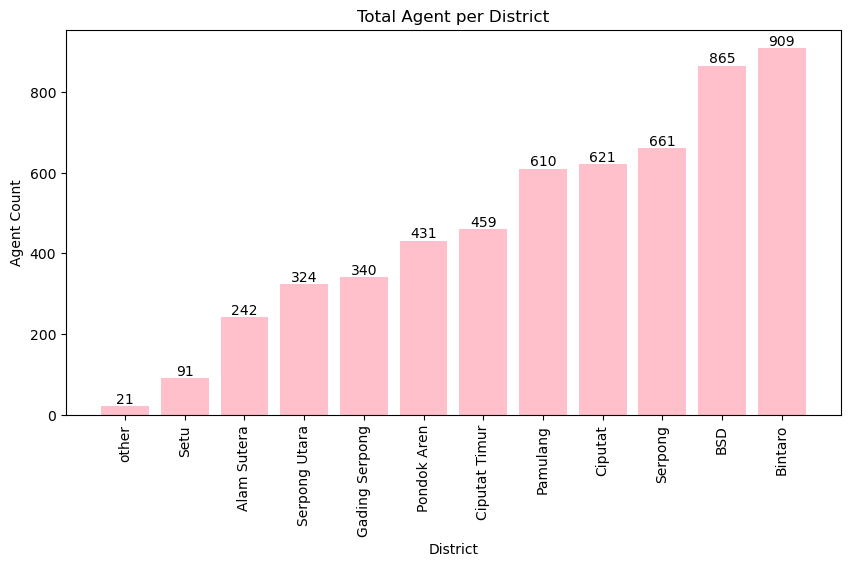

In [87]:
agent_per_area = df_new.groupby('district')['agent'].nunique().sort_values()

plt.figure(figsize=(10, 5))
agentchart = plt.bar(agent_per_area.index, agent_per_area.values, color='pink')
plt.title("Total Agent per District")
plt.xlabel('District')
plt.ylabel('Agent Count')
plt.tick_params(axis='x', rotation=90)
plt.bar_label(agentchart)
plt.show()

**Chart 3**: Scatter Plot of Bed vs Prices

**Chart 1**: From this chart it can be seen that there are some outliers for the price which affect the chart (in around 300 billion and 800 billion). With this the second chart is made. (remove outlier to identify patterns).

**Chart 2**: The second chart still have some outliers for the prices above 40 billion. With this the third chart is made. (remove outlier to identify patterns).

**Chart 3**: The third chart, the pattern is more clear where the price is increasing from 1 bedroom to 4 bedroom house to around 30-40 billion and it decreasing again while going to 10 bedroom. Since a 30-40 billion house is still considered as luxury house in Indonesia. Chart 4 is decided.

**Chart 4**: The fourth chart is filtered for the house with prices under 10 billion which are reasonable in Indonesia. The chart give us an increasing in price from 1 to 4 bedroom and the price is almost the same while the bedroom increases to 10. But from bedroom 7 to 10, the houses with the price under 2 billion is decreasing in amount. This suggest that more bedroom in a house gives a higher price.

Text(0.5, 1.0, 'Bed vs Prices <10 billion')

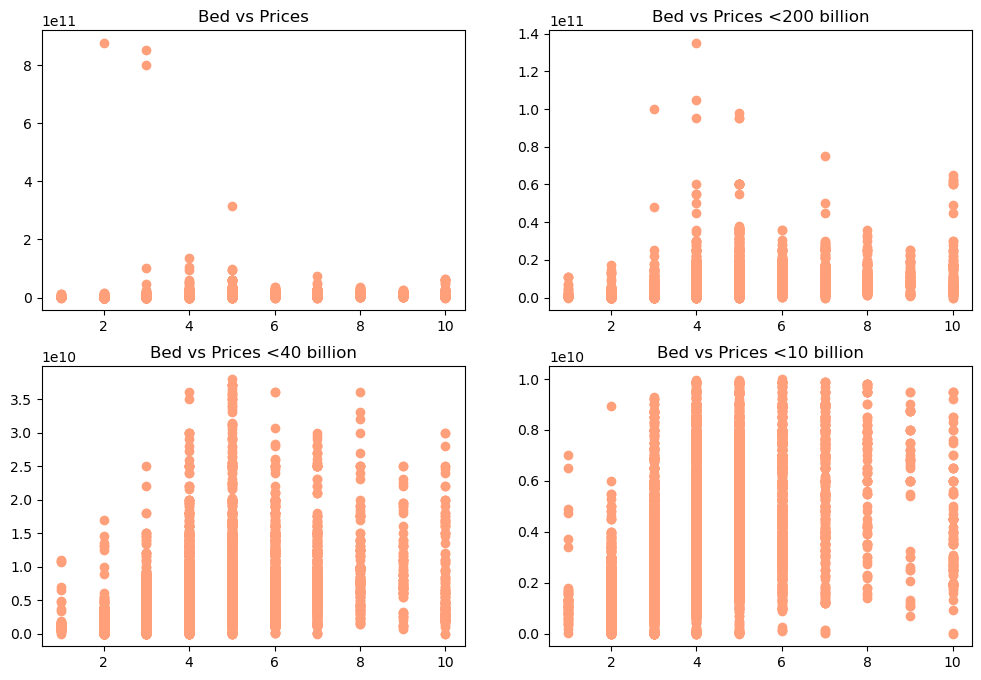

In [88]:
df_bed_price = df_new[df_new['prices'] < 200000000000]
df_bed_price_2 = df_new[df_new['prices'] < 40000000000]
df_bed_price_3 = df_new[df_new['prices'] < 10000000000]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].scatter(df_new['bed'], df_new['prices'], color='lightsalmon')
ax[0, 0].set_title('Bed vs Prices')

ax[0, 1].scatter(df_bed_price['bed'], df_bed_price['prices'], color='lightsalmon')
ax[0, 1].set_title('Bed vs Prices <200 billion')

ax[1, 0].scatter(df_bed_price_2['bed'], df_bed_price_2['prices'], color='lightsalmon')
ax[1, 0].set_title('Bed vs Prices <40 billion')

ax[1, 1].scatter(df_bed_price_3['bed'], df_bed_price_3['prices'], color='lightsalmon')
ax[1, 1].set_title('Bed vs Prices <10 billion')

**Chart 4**: Scatter Plot of Bath vs Prices

**Chart 1**: From this chart it can be seen that there are some outliers for the price which affect the chart (in around 300 billion and 800 billion). With this the second chart is made. (remove outlier to identify patterns).

**Chart 2**: The second chart still have some outliers for the prices above 40 billion. With this the third chart is made. (remove outlier to identify patterns). But a small pattern can be seen here where there is an increase in price from 1 bathroom to 3 bathroom.

**Chart 3**: The third chart, the pattern is more clear where the price is increasing from 1 bathroom to 4 bathroom house to around 30-40 billion and it decreasing again while going to 10 bathroom. Since a 30-40 billion house is still considered as luxury house in Indonesia. Chart 4 is decided.

**Chart 4**: The fourth chart is filtered for the house with prices under 10 billion which are reasonable in Indonesia. The chart give us an increasing in price from 1 to 4 bathroom and the price is almost the same while the bathroom increases to 10. But from bathroom 6 to 10, the houses with the price under 2 billion is decreasing in amount. This suggest that more bathroom in a house gives a higher price and this trend is almost similar to the Bed vs Price chart.

Text(0.5, 1.0, 'Bed vs Prices <10 Billion')

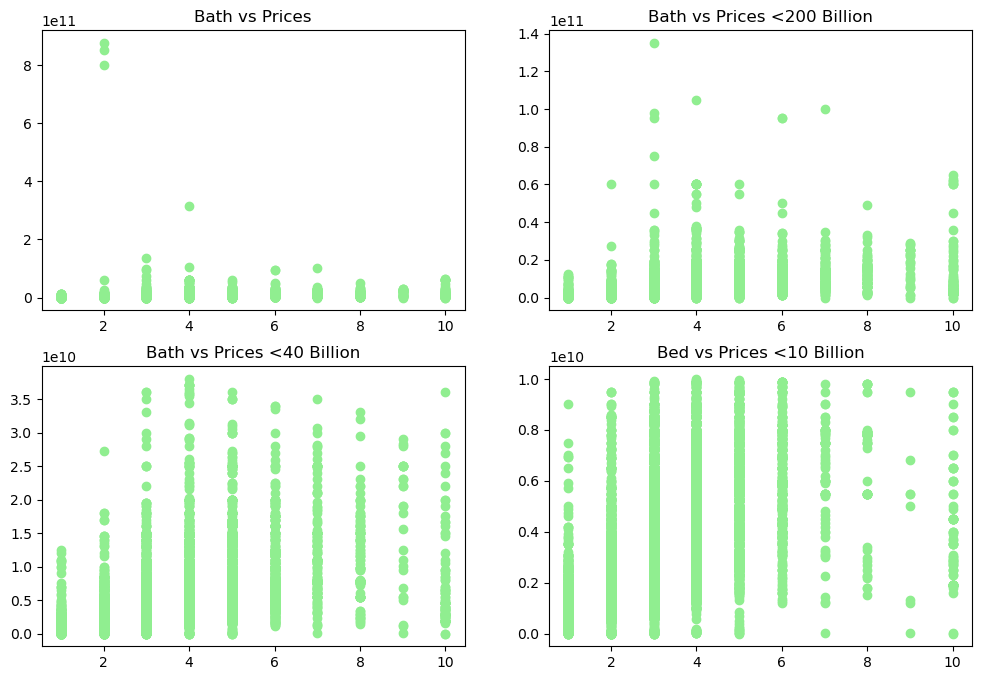

In [89]:
df_bath_price = df_new[df_new['prices'] < 200000000000]
df_bath_price2 = df_new[df_new['prices'] < 40000000000]
df_bath_price3 = df_new[df_new['prices'] < 10000000000]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].scatter(df_new['bath'], df_new['prices'], color='lightgreen')
ax[0, 0].set_title('Bath vs Prices')

ax[0, 1].scatter(df_bath_price['bath'], df_bath_price['prices'], color='lightgreen')
ax[0, 1].set_title('Bath vs Prices <200 Billion')

ax[1, 0].scatter(df_bath_price2['bath'], df_bath_price2['prices'], color='lightgreen')
ax[1, 0].set_title('Bath vs Prices <40 Billion')

ax[1, 1].scatter(df_bath_price3['bath'], df_bath_price3['prices'], color='lightgreen')
ax[1, 1].set_title('Bed vs Prices <10 Billion')

**Chart 5**: Bar Plot of Average Price by Bed, Bath and District

To see a more clear information about the price according to the type of the house, the chart is group by each category (bed, bath, district) and the average price of each class are shown. 

**Chart Bed**: An increasing in Average Price as the number of bedroom increase is shown in the chart. The price keep increasing until a 8 bedroom house, and then it plateau. This boost the correctnes of information gained from the previous scatter plot chart for bed vs price.

**Chart Bath**: An increasing in Average Price as the number of bathroom increase is shown in the chart. The price keep increasing until a 7 bathroom house, and then it increase again in 9 bathroom but decrease to the previous high on the 10 bathroom house. This boost the correctnes of information gained from the previous scatter plot chart for bath vs price.

**Chart District**: While Alam Sutera is not the most occurance district here, it gives the highest average price house in around 6 billion. Follow by BSD and Bintaro in the second and third place since they are the most occurance district. This suggest that houses in Alam Sutera have a higher price and value more than other district.

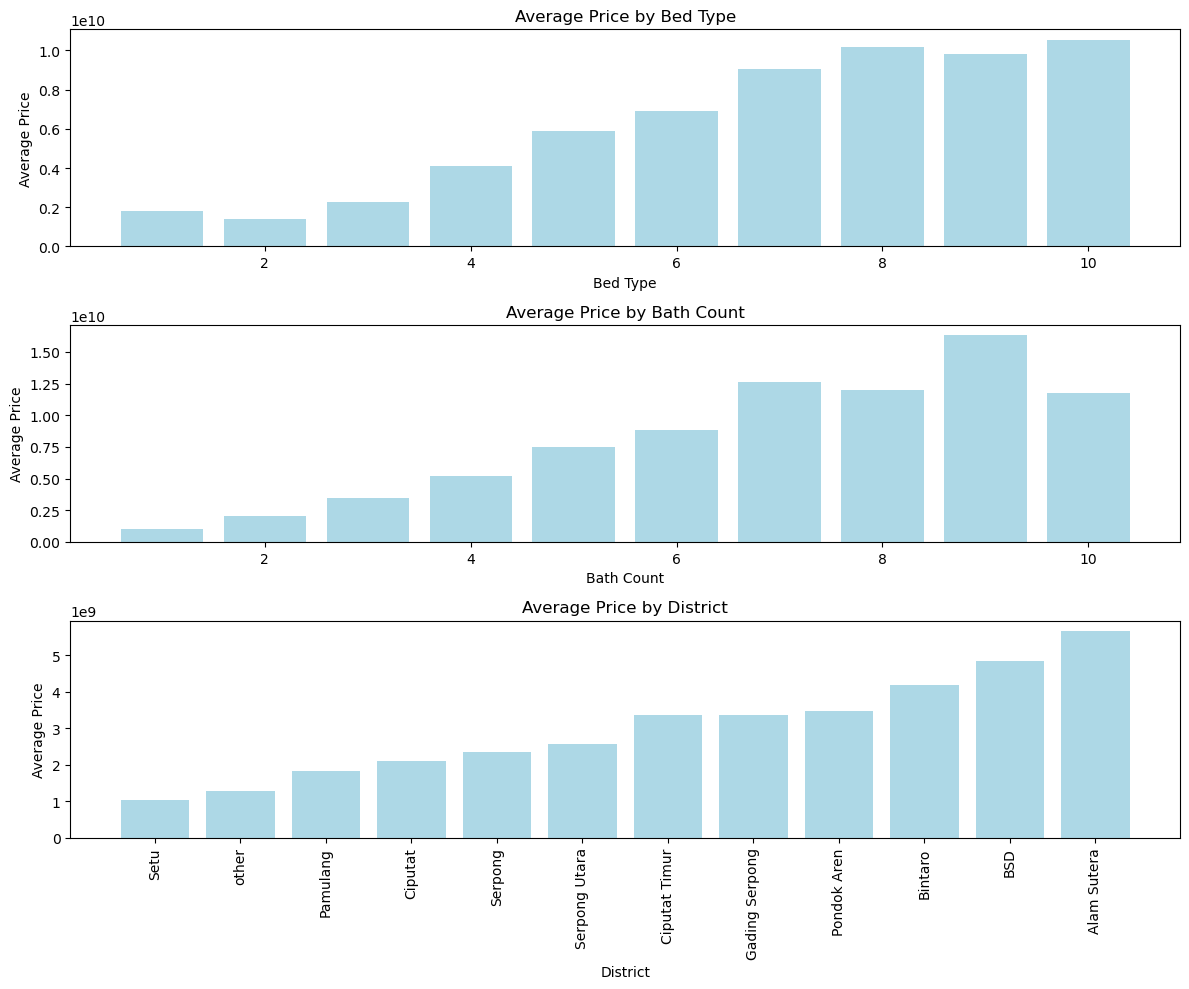

In [90]:
Average_Bed_Price = df_new.groupby('bed')['prices'].mean()
Average_Bath_Price = df_new.groupby('bath')['prices'].mean()
Average_District_Price = df_new.groupby('district')['prices'].mean().sort_values()

fig, ax = plt.subplots(3, 1, figsize=(12, 10))

ax[0].bar(Average_Bed_Price.index, Average_Bed_Price.values, color='lightblue')
ax[0].set_title("Average Price by Bed Type")
ax[0].set_xlabel("Bed Type")
ax[0].set_ylabel("Average Price")

ax[1].bar(Average_Bath_Price.index, Average_Bath_Price.values, color='lightblue')
ax[1].set_title("Average Price by Bath Count")
ax[1].set_xlabel("Bath Count")
ax[1].set_ylabel("Average Price")

ax[2].bar(Average_District_Price.index, Average_District_Price.values, color='lightblue')
ax[2].set_title("Average Price by District")
ax[2].set_xlabel("District")
ax[2].set_ylabel("Average Price")
ax[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

**Chart 6**: Scatter Plot of Listing Floorarea vs Prices

**Chart 1**: From this chart it can be seen that there are some outliers for the price and floorarea which affect the chart (in around 300 billion and 800 billion for the price and in around 100.000 and 400.000 floorarea). With this the second chart is made. (remove outlier to identify patterns).

**Chart 2**: The second chart still have some outliers for the prices above 40 billion and for the floorarea in above 2000 floorarea. With this the third chart is made. (remove outlier to identify patterns).

**Chart 3**: The third chart, the pattern is more clear where the price is increasing if the floorarea is increasing. Since a 30-40 billion house is still considered as luxury house in Indonesia. Chart 4 is decided.

**Chart 4**: The fourth chart is filtered for the house with prices under 20 billion. The chart give us an increasing in price when the floorarea is increasing. The chart shows a positive correlation between floorarea and price. This suggest that higher floorarea in a house gives a higher price.

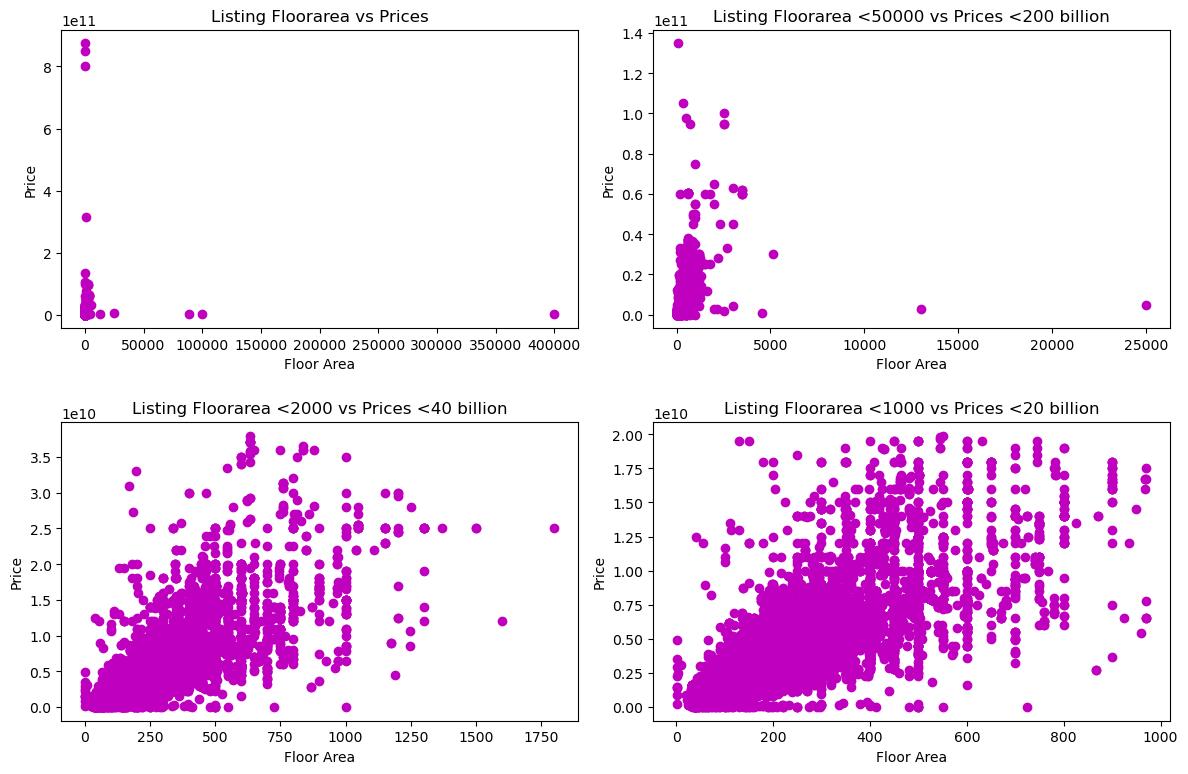

In [91]:
df_price = df_new[(df_new['prices'] < 200000000000) & (df_new['listing floorarea (m^2)'] < 50000)]
df_price2 = df_new[(df_new['prices'] < 40000000000) & (df_new['listing floorarea (m^2)'] < 2000)]
df_price3 = df_new[(df_new['prices'] < 20000000000) & (df_new['listing floorarea (m^2)'] < 1000)]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].scatter(df_new['listing floorarea (m^2)'], df_new['prices'], color='m')
ax[0, 0].set_title('Listing Floorarea vs Prices')
ax[0, 0].set_xlabel('Floor Area')
ax[0, 0].set_ylabel('Price')

ax[0, 1].scatter(df_price['listing floorarea (m^2)'], df_price['prices'], color='m')
ax[0, 1].set_title('Listing Floorarea <50000 vs Prices <200 billion')
ax[0, 1].set_xlabel('Floor Area')
ax[0, 1].set_ylabel('Price')

ax[1, 0].scatter(df_price2['listing floorarea (m^2)'], df_price2['prices'], color='m')
ax[1, 0].set_title('Listing Floorarea <2000 vs Prices <40 billion')
ax[1, 0].set_xlabel('Floor Area')
ax[1, 0].set_ylabel('Price')

ax[1, 1].scatter(df_price3['listing floorarea (m^2)'], df_price3['prices'], color='m')
ax[1, 1].set_title('Listing Floorarea <1000 vs Prices <20 billion')
ax[1, 1].set_xlabel('Floor Area')
ax[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

**Chart 7**: Scatter Plot of Listing Price per Floorarea vs Prices

**Chart 1**: From this chart it can be seen that there are some outliers for the price and floorarea price which affect the chart (in around 300 billion and 800 billion for the price and the floorarea price above 4 billion). With this the second chart is made. (remove outlier to identify patterns).

**Chart 2**: The second chart still have some outliers for the prices above 40 billion and for the floorarea price in above 1 billion. With this the third chart is made. (remove outlier to identify patterns).

**Chart 3**: The third chart still have some outliers for the prices above 30 billion and for the floorarea price in above 90 million. With this the third chart is made. (remove outlier to identify patterns).

**Chart 4**: The fourth chart is filtered for the house with prices under 30 billion. The chart give us an increasing in price when the floorarea price is increasing. The chart shows a positive correlation between floorarea price and price. This suggest that higher floorarea price in a house gives a higher house price.

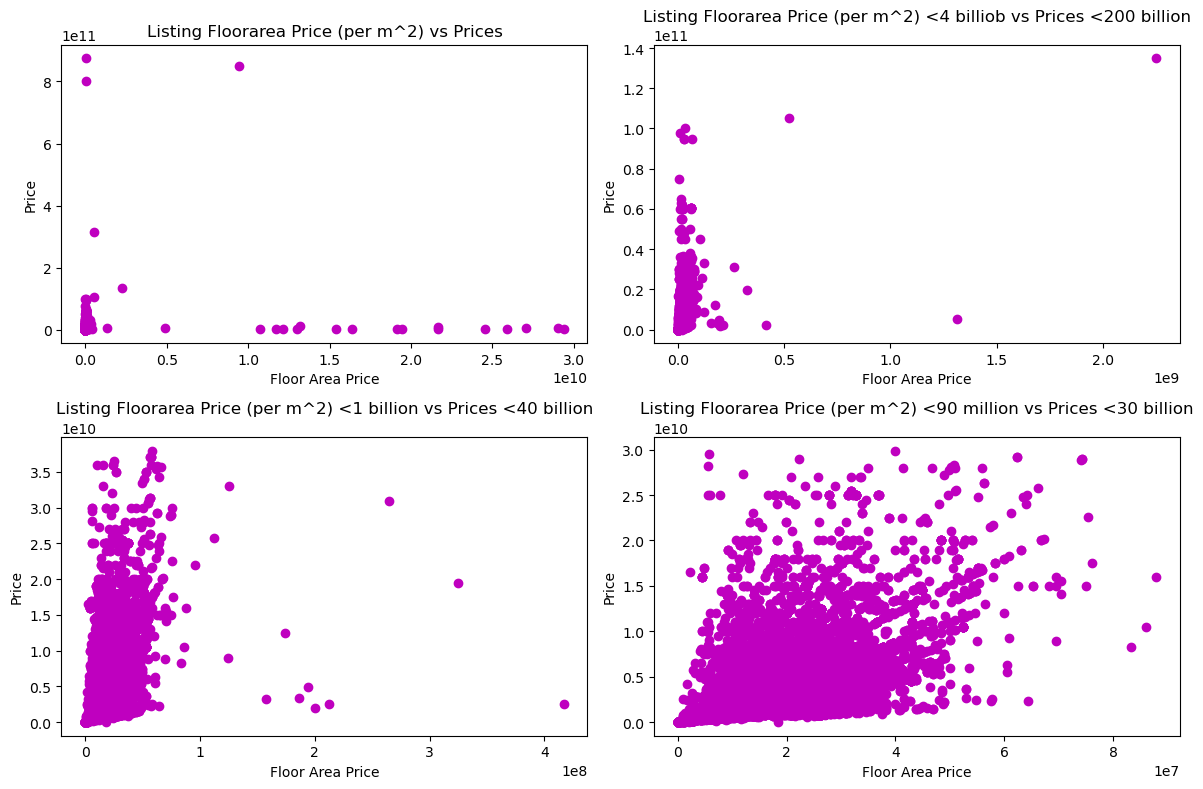

In [92]:
df_price = df_new[(df_new['prices'] < 200000000000) & (df_new['listing-price-floorarea (per m^2)'] < 4000000000)]
df_price2 = df_new[(df_new['prices'] < 40000000000) & (df_new['listing-price-floorarea (per m^2)'] < 1000000000)]
df_price3 = df_new[(df_new['prices'] < 30000000000) & (df_new['listing-price-floorarea (per m^2)'] < 90000000)]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

ax[0, 0].scatter(df_new['listing-price-floorarea (per m^2)'], df_new['prices'], color='m')
ax[0, 0].set_title('Listing Floorarea Price (per m^2) vs Prices')
ax[0, 0].set_xlabel('Floor Area Price')
ax[0, 0].set_ylabel('Price')

ax[0, 1].scatter(df_price['listing-price-floorarea (per m^2)'], df_price['prices'], color='m')
ax[0, 1].set_title('Listing Floorarea Price (per m^2) <4 billiob vs Prices <200 billion')
ax[0, 1].set_xlabel('Floor Area Price')
ax[0, 1].set_ylabel('Price')

ax[1, 0].scatter(df_price2['listing-price-floorarea (per m^2)'], df_price2['prices'], color='m')
ax[1, 0].set_title('Listing Floorarea Price (per m^2) <1 billion vs Prices <40 billion')
ax[1, 0].set_xlabel('Floor Area Price')
ax[1, 0].set_ylabel('Price')

ax[1, 1].scatter(df_price3['listing-price-floorarea (per m^2)'], df_price3['prices'], color='m')
ax[1, 1].set_title('Listing Floorarea Price (per m^2) <90 million vs Prices <30 billion')
ax[1, 1].set_xlabel('Floor Area Price')
ax[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

### Encoding

In [93]:
df_new.head()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,agent,area
0,5.0,5.0,20720721.0,420.0,6.900000e+09,Gading Serpong,vonni,cluster aquamarine
1,3.0,3.0,12747875.0,190.0,4.500000e+09,Gading Serpong,vonni,cluster alexandrite
2,3.0,3.0,30859375.0,132.0,3.950000e+09,Gading Serpong,vonni,cluster vivaldi
3,4.0,3.0,18333333.0,220.0,3.300000e+09,Gading Serpong,vonni,cluster starling
4,3.0,2.0,27777778.0,180.0,3.500000e+09,Gading Serpong,vonni,cluster newton


**Encoding** refers to the process of transforming categorical data into a numerical format that can be understood by algorithms. This is essential because most machine learning algorithms are designed to work with numerical data and cannot understand non numeric data.

**Frequency Encoding** is used here to deal categorical variables with a large number of unique values. It is also used when the categorical variable is not expected to have a strong ordinal relationship between categories. Since there are a lot of unique values in district, agent and area, frequency encoding is used here.

In [94]:
columns_to_encode = ['district', 'agent', 'area']
for col in columns_to_encode:
    encoding = df_new[col].value_counts(normalize=True)
    df_new[col] = df_new[col].map(encoding)

### Data Splitting

In [95]:
df_new.head()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,agent,area
0,5.0,5.0,20720721.0,420.0,6.900000e+09,0.069395,0.002754,0.000042
1,3.0,3.0,12747875.0,190.0,4.500000e+09,0.069395,0.002754,0.000042
2,3.0,3.0,30859375.0,132.0,3.950000e+09,0.069395,0.002754,0.000127
3,4.0,3.0,18333333.0,220.0,3.300000e+09,0.069395,0.002754,0.000042
4,3.0,2.0,27777778.0,180.0,3.500000e+09,0.069395,0.002754,0.000042


In [96]:
df_in = df_new.drop('prices', axis=1)
df_out = df_new['prices']

print(df_in)
print(df_out)

       bed  bath  listing-price-floorarea (per m^2)  listing floorarea (m^2)  \
0      5.0   5.0                         20720721.0                    420.0   
1      3.0   3.0                         12747875.0                    190.0   
2      3.0   3.0                         30859375.0                    132.0   
3      4.0   3.0                         18333333.0                    220.0   
4      3.0   2.0                         27777778.0                    180.0   
...    ...   ...                                ...                      ...   
29415  3.0   3.0                         21710526.0                    300.0   
29416  8.0   4.0                         36363636.0                    330.0   
29417  3.0   2.0                         18333333.0                    160.0   
29418  3.0   2.0                         21666667.0                    120.0   
29419  4.0   3.0                         30555556.0                    200.0   

       district     agent      area  
0

**Data Splitting** is where a dataset is divided into two subsets: a training set and a testing set. The training set is used to train the model, while the testing set is used to evaluate the model's performance on unseen data. The data is split to a common ratio of 80% training set and 20% testing set.

In [97]:
X_train, X_test, y_train, y_test = train_test_split(df_in, df_out, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18883, 7)
(4721, 7)
(18883,)
(4721,)


**Correlations** measure the relationship between two variables. When two variables are correlated, changes in one variable are associated with changes in the other. This can be a positive correlation (both variables increase or decrease together) or a negative correlation (one variable increases as the other decreases). A higher value of correlations indicate a higher relationship between each variables. (value range from -1 to 1).

In [98]:
df_new.corr()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,agent,area
bed,1.000000,0.798638,0.010034,0.047311,0.185787,0.216171,0.070666,0.027364
bath,0.798638,1.000000,0.008530,0.043940,0.203703,0.200252,0.072761,0.025178
listing-price-floorarea (per m^2),0.010034,0.008530,1.000000,-0.000139,0.065764,0.001280,-0.004899,-0.000353
listing floorarea (m^2),0.047311,0.043940,-0.000139,1.000000,0.018296,0.001600,0.000070,-0.001001
prices,0.185787,0.203703,0.065764,0.018296,1.000000,0.054305,0.028679,-0.001783
district,0.216171,0.200252,0.001280,0.001600,0.054305,1.000000,0.322913,0.144383
agent,0.070666,0.072761,-0.004899,0.000070,0.028679,0.322913,1.000000,0.021146
area,0.027364,0.025178,-0.000353,-0.001001,-0.001783,0.144383,0.021146,1.000000


### Normalization

**Normalization** is a process of transforming data into a standard format, typically between 0 and 1. This is often done to ensure that different features or variables are on a comparable scale, preventing features with larger magnitudes from dominating the analysis.

In [99]:
X_train.head()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),district,agent,area
19389,4.0,3.0,17857143.0,107.0,0.191112,0.000508,0.000042
14556,5.0,3.0,19774011.0,250.0,0.366802,0.000551,0.000042
2712,5.0,5.0,17475728.0,120.0,0.191112,0.000127,0.000339
475,3.0,3.0,16666667.0,60.0,0.071767,0.000339,0.000127
9843,3.0,3.0,19166667.0,150.0,0.069395,0.000763,0.000042


<Figure size 1200x1000 with 0 Axes>

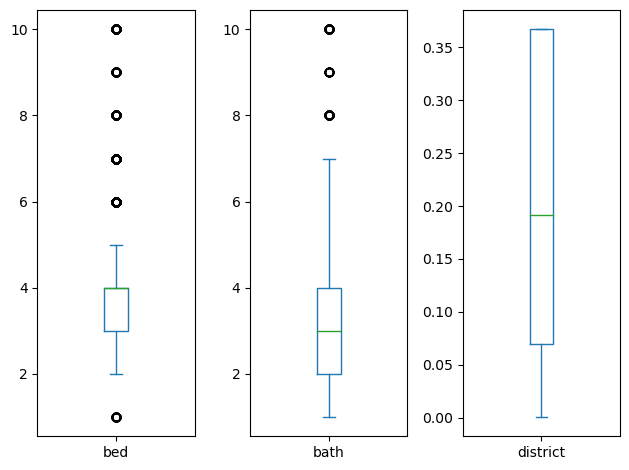

In [100]:
plt.figure(figsize=(12, 10))
X_train[['bed', 'bath', 'district']].plot(kind='box', subplots=True, layout=(1, 3))
plt.tight_layout()
plt.show()

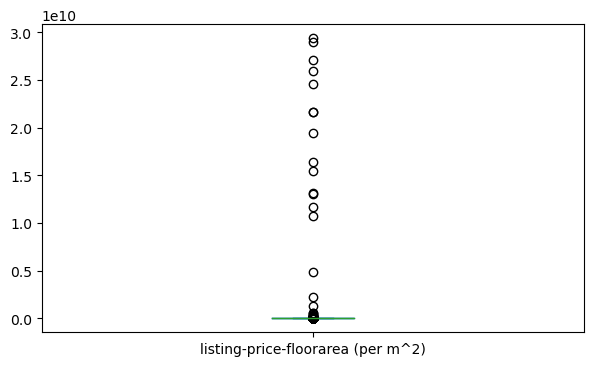

In [101]:
plt.figure(figsize=(7, 4))
X_train['listing-price-floorarea (per m^2)'].plot(kind='box')
plt.show()

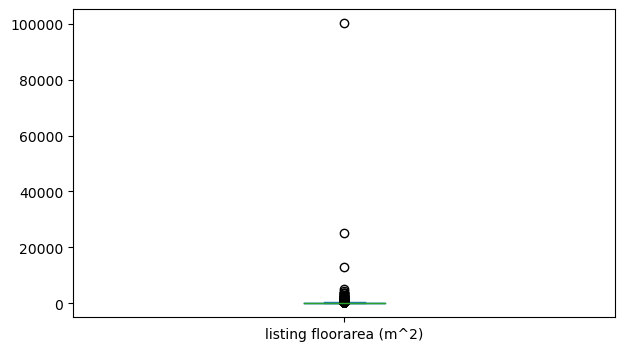

In [102]:
plt.figure(figsize=(7, 4))
X_train['listing floorarea (m^2)'].plot(kind='box')
plt.show()

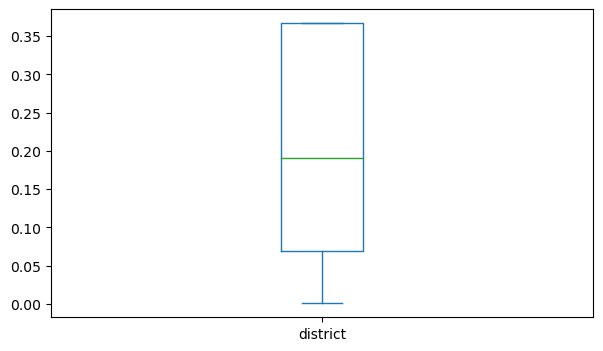

In [103]:
plt.figure(figsize=(7, 4))
X_train['district'].plot(kind='box')
plt.show()

In [104]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
X1_heads = pd.DataFrame(X_train)
X2_heads = pd.DataFrame(X_test)

In [106]:
X1_heads.head()

,0,1,2,3,4,5,6
0,0.174237,0.000117,-0.029831,-0.112707,-0.043533,-0.646423,-0.283440
1,0.910445,0.000117,-0.026471,0.071716,1.227943,-0.631556,-0.283440
2,0.910445,1.467996,-0.030500,-0.095941,-0.043533,-0.780232,-0.134347
3,-0.561971,0.000117,-0.031918,-0.173322,-0.907229,-0.705894,-0.240842
4,-0.561971,0.000117,-0.027536,-0.057251,-0.924398,-0.557217,-0.283440


In [107]:
X2_heads.head()

,0,1,2,3,4,5,6
0,0.910445,0.000117,-0.039690,0.329651,-0.942794,-0.809968,-0.283440
1,0.174237,0.000117,-0.009715,0.103958,-0.043533,-0.750497,-0.283440
2,-0.561971,0.000117,-0.044527,0.181339,-1.100387,-0.795100,-0.240842
3,-1.298179,-1.467763,-0.060987,-0.199115,-0.902630,-0.349070,-0.283440
4,-0.561971,0.000117,-0.004950,-0.101100,-0.924398,-0.720762,0.121242


### Modeling

**Modeling** in machine learning is the process of constructing a mathematical representation, or model, of a real-world phenomenon. This model is designed to learn patterns and relationships within a dataset, allowing it to make predictions or decisions on new, unseen data. The goal is to create a model that can generalize well, meaning it can accurately predict outcomes for data points it hasn't encountered before.

Since our target variable is the price of a house (continuous numerical value), so a regression model is used here. Some of the regression model used are:
1. RandomForest
2. K-Nearest Neighbors (KNN)
3. Support Vector Machine (SVM)
4. XGBoost (eXtreme Gradient Boosting)
5. AdaBoost (Adaptive Boosting)

To see the performance of the models, some evaluation metrics are use to see how good the model is. In this regression task, 2 evaluation metrics are use:
1. Mean Absolute Error (**MAE**): Measures the average absolute error in units of the target variable. A lower MAE indicates better model performance. 
2. Mean Absolute Percentage Error (**MAPE**): The average absolute percentage difference between the predicted values and the actual values. A lower MAPE indicates better model performance.

#### RandomForest Regression Model
**Random Forest** is an ensemble learning method that combines multiple decision trees. Each tree is trained on a random subset of the features and data points, reducing the correlation between trees and improving generalization. This ensemble approach helps to mitigate the risk of overfitting and provides more robust predictions.

In [108]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [109]:
rf_predict = rf.predict(X_test)

In [110]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(rf_predict, y_test))
print('MAPE: ', mean_absolute_percentage_error(rf_predict, y_test))

Evaluation Score: 
MAE:  1044407329.6881868
MAPE:  0.19353611134953108


#### K-Nearest Neighbors (KNN) Regression Model
**K-Nearest Neighbors (KNN)** is a non-parametric algorithm that makes predictions based on the nearest neighbors of a new data point. The value of K determines the number of neighbors considered. By averaging the target values of these neighbors, KNN can predict the value for the new data point.

In [111]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [112]:
knn_predict = knn.predict(X_test)

In [113]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(knn_predict, y_test))
print('MAPE: ', mean_absolute_percentage_error(knn_predict, y_test))

Evaluation Score: 
MAE:  1341345044.2700276
MAPE:  0.35027389310877566


#### Support Vector Machine (SVM)
**SVM** is a margin-based algorithm that finds a hyperplane that separates the data into classes with the largest possible margin. The goal is to maximize the distance between the hyperplane and the closest data points from each class. SVMs can handle both linear and non-linear relationships between features using the kernel trick.

In [114]:
svm = make_pipeline(SVR())
svm.fit(X_train, y_train)

Pipeline(steps=[('svr', SVR())])

In [115]:
svm_predict = svm.predict(X_test)

In [116]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(svm_predict, y_test))
print('MAPE: ', mean_absolute_percentage_error(svm_predict, y_test))

Evaluation Score: 
MAE:  2398641104.6289635
MAPE:  0.959456698218191


#### XGBoost (eXtreme Gradient Boosting)
**XGBoost** is an ensemble method that combines multiple decision trees in a boosting framework. It builds each tree sequentially, focusing on correcting the errors of the previous trees. XGBoost incorporates regularization techniques to prevent overfitting and provides efficient training and prediction. 

In [117]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [118]:
xgb_predict = xgb_model.predict(X_test)

In [119]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(xgb_predict, y_test))
print('MAPE: ', mean_absolute_percentage_error(xgb_predict, y_test))

Evaluation Score: 
MAE:  1228623972.4123068
MAPE:  0.35662416729907515


#### AdaBoost (Adaptive Boosting)
**AdaBoost** is another ensemble method that combines multiple weak learners (e.g., decision trees) in a boosting framework. It assigns higher weights to misclassified examples, focusing on the more difficult instances. AdaBoost can be effective in improving the performance of weak learners.

In [120]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [121]:
ada_predict = ada.predict(X_test)

In [122]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(ada_predict, y_test))
print('MAPE: ', mean_absolute_percentage_error(ada_predict, y_test))

Evaluation Score: 
MAE:  1925036651.7057827
MAPE:  0.6570947255351832


After the modeling process, each model have its own evaluation metrics the best model to the least model are:
1. RandomForest 
2. XGBoost
3. KNN
4. AdaBoost
5. SVM

The best score from randomforest is around 1.03 billion for the MAE and 0.189 or 18.9% for the MAPE. The least score is from SVM which has almost 2.4 billion for the MAE and 0.9594 or 95.94% for the MAPE which is so bad. With this result a randomforest model is chosen as the model to predict the price of the house in this dataset. A 1 billion error is still consider high since the average price of the house is around 3.7 billion per house.

From the correlation table before, the relationship between area and prices are very weak with only a value of -0.001783	(from range -1 to 1). With weak correlation, it is possible that the model will not learn the pattern enough. Because of that, the 'area' column will be drop.

In [123]:
filtered_df = df_new.drop(['area'], axis=1)
filtered_df.head()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district,agent
0,5.0,5.0,20720721.0,420.0,6.900000e+09,0.069395,0.002754
1,3.0,3.0,12747875.0,190.0,4.500000e+09,0.069395,0.002754
2,3.0,3.0,30859375.0,132.0,3.950000e+09,0.069395,0.002754
3,4.0,3.0,18333333.0,220.0,3.300000e+09,0.069395,0.002754
4,3.0,2.0,27777778.0,180.0,3.500000e+09,0.069395,0.002754


In [124]:
df_in_2 = filtered_df.drop(['prices'], axis=1)
df_out_2 = filtered_df['prices']

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_in_2, df_out_2, test_size=0.2, random_state=42)
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)

(18883, 6)
(4721, 6)
(18883,)
(4721,)


In [125]:
X_train_2 = scaler.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [126]:
rf.fit(X_train_2, y_train_2)

RandomForestRegressor()

In [127]:
rf_predict_2 = rf.predict(X_test_2)

After dropping column 'area' which has a low correlation value with the target variable, the data is trained using the randomforest model since it has the lowest MAE and MAPE previously, but the score of the MAE and MAPE change only a little bit from the first randomforest model.

In [128]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(rf_predict_2, y_test_2))
print('MAPE: ', mean_absolute_percentage_error(rf_predict_2, y_test_2))

Evaluation Score: 
MAE:  1022728208.4967513
MAPE:  0.18895233074215304


To increase the model performance, the outliers are decided to be drop because a house with a hundred billion price in Indonesia is consider as unusual and only super rich people can afford to buy that house. The listing floorarea is filtered to under 1000 and the listing price floorarea is under 80 million. The column 'agent' is also dropped because it has a low correlation score.

In [129]:
outlier_df = df_new.drop(['area', 'agent'], axis=1)
outlier_df = outlier_df[(outlier_df['prices'] < 120000000000) & (outlier_df['listing floorarea (m^2)'] < 1000) & (outlier_df['listing-price-floorarea (per m^2)'] < 80000000)]
outlier_df.head()

,bed,bath,listing-price-floorarea (per m^2),listing floorarea (m^2),prices,district
0,5.0,5.0,20720721.0,420.0,6.900000e+09,0.069395
1,3.0,3.0,12747875.0,190.0,4.500000e+09,0.069395
2,3.0,3.0,30859375.0,132.0,3.950000e+09,0.069395
3,4.0,3.0,18333333.0,220.0,3.300000e+09,0.069395
4,3.0,2.0,27777778.0,180.0,3.500000e+09,0.069395


In [130]:
df_in_3 = outlier_df.drop(['prices'], axis=1)
df_out_3 = outlier_df['prices']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_in_3, df_out_3, test_size=0.2, random_state=42)
print(X_train_3.shape)
print(X_test_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)

(18748, 5)
(4687, 5)
(18748,)
(4687,)


In [131]:
X_train_3 = scaler.fit_transform(X_train_3)
X_test_3 = scaler.transform(X_test_3)

In [132]:
rf.fit(X_train_3, y_train_3)

RandomForestRegressor()

In [133]:
rf_predict_3 = rf.predict(X_test_3)

After dropping column 'area' and 'agent' follow by removing the outliers, the MAE score decrease to almost half of the previous model to around 553 million and a MAPE of 0.1584 or 15.84%. This value is still considered a little bit high since an error of 553 million from 3.7 billion (mean) price is still considerable in the context of buying a house.

In [134]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(rf_predict_3, y_test_3))
print('MAPE: ', mean_absolute_percentage_error(rf_predict_3, y_test_3))

Evaluation Score: 
MAE:  553427419.5766917
MAPE:  0.15845547268267665


### Model Tuning

**Model tuning** is a critical step in machine learning that involves fine-tuning a model's hyperparameters to optimize its performance. By carefully adjusting these parameters, which are not learned from the data during training, it can enhance the model's accuracy, prevent overfitting, and tailor it to your specific dataset and problem. This can leads to better results and more effective machine learning solutions.

The **param_dist** dictionary defines the grid of hyperparameters to be explored during the tuning process. The hyperparameter include:
1. **n_estimators**: The number of decision trees in the forest.
2. **max_depth**: The maximum depth of each decision tree.
3. **min_samples_split**: The minimum number of samples required to split an internal node.
4. **min_samples_leaf**: The minimum number of samples required to be at a leaf node.
5. **max_features**: The number of features considered when splitting a node.
6. **bootstrap**: Whether to use bootstrapping (sampling with replacement) when building trees.

In [135]:
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

The tuning process is performed using the Randomized Search CV. a **Randomized Search** will perform a random search to find the best combination of hyperparameters for the RandomForestRegressor model based on the specified parameters and scoring metric. The parameters used are:
1. **estimator=rf**: Sets the RandomForestRegressor instance as the model to be tuned.
2. **param_distributions=param_dist**: Specifies the dictionary of hyperparameters to be explored during the random search.
3. **n_iter=100**: Sets the number of random combinations of hyperparameters to sample.
4. **scoring='neg_mean_absolute_error'**: Specifies the scoring metric used to evaluate the model's performance.
5. **cv=3**: Sets the number of cross-validation folds. 
6. **verbose=2**: Sets the verbosity level of the search process. A value of 2 provides more detailed output
7. **random_state=42**: Sets the random seed
8. **n_jobs=-1**: Sets the number of parallel jobs to run.

In [136]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   scoring='neg_mean_absolute_error',
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

In [137]:
random_search.fit(X_train_3, y_train_3)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [138]:
print("Best Hyperparameters:", random_search.best_params_)

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


Fit the best hyperparameters output to the RandomForestRegressor model.

In [147]:
rf_tuned = RandomForestRegressor(n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, bootstrap=False)
rf_tuned.fit(X_train_3, y_train_3)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000)

In [148]:
rf_predict_tuned = rf_tuned.predict(X_test_3)

In [149]:
print('Evaluation Score: ')
print('MAE: ', mean_absolute_error(rf_predict_tuned, y_test_3))
print('MAPE: ', mean_absolute_percentage_error(rf_predict_tuned, y_test_3))

Evaluation Score: 
MAE:  528831776.947908
MAPE:  0.153436860393556


### Evaluation & Conclusion

After tuning the model with Random Search CV, the MAE is decreasing a little bit to 528.8 million from around 553 million and the MAPE is also decreasing a little bit to 0.1534 or 15.34% from a MAPE of 0.1584 or 15.84%. Even though both of the evaluation metrics is decreasing, it still indicates that the model has a little bit high error considering the mean house price is 3.7 billion. While this might be acceptable for some applications, it also indicates a considerable margin of error in the model's predictions. Overall, the model could benefit from further tuning or the exploration of alternative models to improve its accuracy and reliability in predicting house prices.

### Further Works Recommendation

1. To improve the model's performance, a more thorough data cleaning and preprocessing process must be done especially for the text data.
2. Explore alternative regression models and conduct more extensive hyperparameter tuning for the current or alternative models to find optimal settings.